# 生産側から見る景気循環

## 始める前に

次のセルの１行目以外をアンコメント（`# `を削除）しなさい。アンコメントするには次の手順に従う。
* Windowsの場合：１行目以外の全ての行を選択し，`Ctrl`を押したまま`/`を押す。
* Macの場合：１行目以外の全ての行を選択し，`command`を押したまま`/`を押す。

In [1]:
# CELL PROVIDED
# import piplite
# await piplite.install(['py4macro','japanize-matplotlib-jlite'])
# %matplotlib inline
# import statsmodels
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (4, 3)

次のコードを実行しなさい。

In [31]:
# CELL PROVIDED
import japanize_matplotlib_jlite
import numpy as np
import pandas as pd
import py4macro
import statsmodels.formula.api as smf

## はじめに

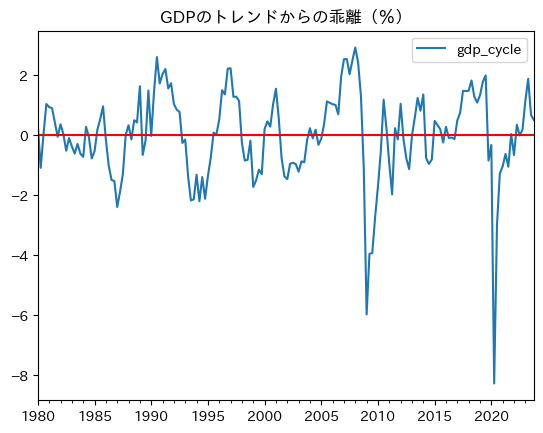

In [3]:
# CELL PROVIDED

# データの読み込み
df = py4macro.data('jpn-q')

# トレンドからの％乖離のデータの作成
df['gdp_cycle'] = 100 * (
    np.log( df['gdp'] ) - py4macro.trend( np.log(df['gdp']) )
)

# プロット
ax = df.plot(y='gdp_cycle', title='GDPのトレンドからの乖離（％）')
ax.axhline(0, c='red')
pass

景気循環はGDPの変動ので特徴づけられる。一方で，GDPの三面等価の原則は次式を意味する。
```
生産側GDP = 支出側GDP = 分配側GDP
```

この原則を踏まえて，上のプロットにあるGDPの変動を考えてみよう。
GDPがトレンドを上回っても下回っても，三面等かの法則は成立することを考えると，生産側GDPの決定要因及び支出側・分配側GDPの構成要素も変動していることになる。
では，

> どのような要因がGDPの変動に大きな影響を与えているのだろうか。

ここでは生産側GDPの決定要因に着目し，この問を考察する。
具体的には，集計的生産関数を仮定し，産出量の決定要因である生産要素をランダム変数と捉え，GDPの変動へ貢献度を定量的に測定することを試みる。

## 景気循環の要素分解：生産側

### 定量的な問い

集計的生産関数は次式で与えられると仮定する。

$$
Y_t=A_tK_t^cH_t^{1-c}
\qquad 0<c<1
\tag{1}
$$

* $Y_t$：GDP（Gross Domestic Product; 国内総生産）
* $K_t$：資本ストック
* $H_t$：総労働時間（労働者数$\times$労働者平均労働時間）
* $A_t$：TFP（Total Factor Productivity; 全要素生産性）
    * $K_t$と$H_t$以外の要素（技術水準として解釈）

＜仮定＞
* 全ての時点で、上記の生産関数に従ってGDPが決定される。
* $A_t$、$K_t$、$H_t$は何らかの経済学的なメカニズムによって決定される　$\Rightarrow$　データにはランダムな値として現れる。
    * 生産関数の右辺はランダム　$\Rightarrow$　左辺の$Y_t$はランダム

また、$Y_t$のトレンドは`＊`の添え字がついた次式で与えられ、

$$
Y_t^{*}=A_t^{*}(K_t^{*})^c(H_t^{*})^{1-c}
\tag{2}
$$

式(1)を式(2)で割ると式(3)となる。

$$
\frac{Y_t}{Y_t^{*}}=
\frac{A_t}{A_t^{*}}
\left(\frac{K_t}{K_t^{*}}\right)^c
\left(\frac{H_t}{H_t^{*}}\right)^{1-c}
\tag{3}
$$

最後に、式(3)を対数化する。

$$
y_t=a_t + ck_t + (1-c)h_t
\tag{4}
$$

* $y_t\equiv\log\left(\dfrac{Y_t}{Y_t^{*}}\right)$：$Y_t$のトレンドからの％乖離
* $a_t\equiv\log\left(\dfrac{A_t}{A_t^{*}}\right)$：$A_t$のトレンドからの％乖離
* $k_t\equiv\log\left(\dfrac{K_t}{K_t^{*}}\right)$：$K_t$のトレンドからの％乖離
* $h_t\equiv\log\left(\dfrac{H_t}{H_t^{*}}\right)$：$H_t$のトレンドからの％乖離

＜定量的な問い＞
> $y_t$（生産側GDP）の変動の何％が$a_t$、$ck_t$、$(1-c)h_t$の変動に起因しているか？

### 分散分解

**＜分散と共分散＞**
* $x$の分散：$\text{Var}(x)$（variance）
* $x$と$y$の共分散：$\text{Cov}(x,y)$（covariance）

**＜分散分解＞**

対数化されたGDPの分散

\begin{align}
\text{Var}(y_t)
&=\text{Cov}(y_t,y_t)\\
&=\text{Cov}(y_t,a_t + ck_t + (1-c)h_t)\\
&=\text{Cov}(y_t,a_t)+\text{Cov}(y_t,ck_t)+\text{Cov}(y_t,(1-c)h_t)\\
&=\text{Cov}(y_t,a_t)+c\text{Cov}(y_t,k_t)+(1-c)\text{Cov}(y_t,h_t)\\
y_t\text{の変動}
&=[a_t\text{による}y_t\text{の変動}]+[k_t\text{による}y_t\text{の変動}]+[h_t\text{による}y_t\text{の変動}]
\end{align}

**＜各要素の貢献度＞**

$$
\begin{aligned}
&a_t\text{の寄与度}=\frac{a_t\text{による}y_t\text{の変動}}{y_t\text{の変動}}
=\frac{\text{Cov}(a_t,y_t)}{\text{Var}(y_t)}\\
&k_t\text{の寄与度}=\frac{k_t\text{による}y_t\text{の変動}}{y_t\text{の変動}}
=c\frac{\text{Cov}(k_t,y_t)}{\text{Var}(y_t)}\\
&h_t\text{の寄与度}=\frac{h_t\text{による}y_t\text{の変動}}{y_t\text{の変動}}
=(1-c)\frac{\text{Cov}(h_t,y_t)}{\text{Var}(y_t)}
\end{aligned}
$$

これらを計算することにより、各要素が$y_t$の変動に何％貢献しているかを数量化できる。

### データ

上で読み込んだデータ`df`には次の変数が含まれている（詳細は`GDP：水準・トレンド・変動`を参照）。
* 期間：1980年Q1〜
* `gdp`：国内総生産（支出側）
* `capital`：資本ストック
* `employed`：就業者
* `hours`：労働者1人あたり月平均就業時間（以下では「平均労働時間」と呼ぶ）
* `total_hours`：総労働時間（`hours`$\times$`employed`）

## 労働時間と雇用の特徴

平均労働時間`hours`，就業者数`employed`，総労働時間`total_hours`の特徴を考えてみる。まず変動（サイクル）を計算するが、次の点に留意し計算方法が異なる。
* `hours`は上限があり、長期間持続的に上昇もしくは減少しない。
* `employed`は長期間持続的に上昇もしくは減少することは可能な変数。
* `total_hours`は、`hours`と`employed`の掛け算となっているため、長期間持続的に上昇もしくは減少することは可能な変数。

In [4]:
# 平均労働時間
df['hours_trend'] = py4macro.trend( df['hours'] )
df['hours_cycle'] = 100 * np.log( df['hours'] / df['hours_trend'] )

# 就業者数
df['employed_log_trend'] = py4macro.trend( np.log(df['employed']) )
df['employed_cycle'] = 100 * ( np.log( df['employed'] ) - df['employed_log_trend'] )

# 総労働時間
df['total_hours_log_trend'] = py4macro.trend( np.log(df['total_hours']) )
df['total_hours_cycle'] = 100 * ( np.log( df['total_hours'] ) - df['total_hours_log_trend'] )

最初に，平均労働時間を考えよう。

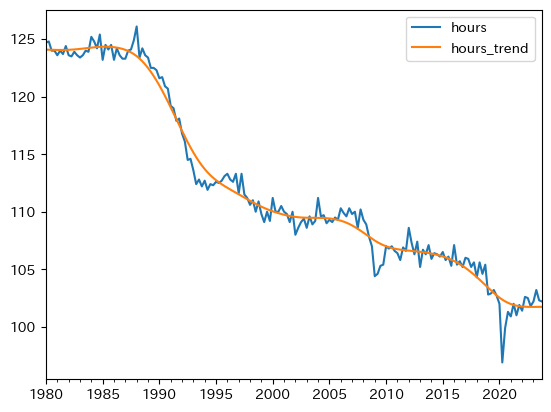

In [5]:
df.plot(y=['hours','hours_trend'])
pass

平均労働時間は長期的に減少傾向にある。2020年の平均が100に標準化しているので，1980年代には約25％長かったことを示している。次に，就業者数を図示する。

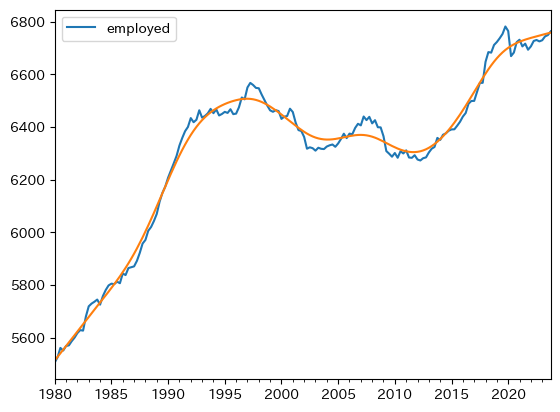

In [6]:
ax_ = df.plot(y='employed')
np.exp( df['employed_log_trend'] ).plot(ax=ax_)
pass

一方，雇用者数は増加傾向にある。女性の労働市場参加率の増加や，雇用形態の変化（非正規など）の影響と考えられる。上の２つの変化を反映したのが総労働時間の変化である。

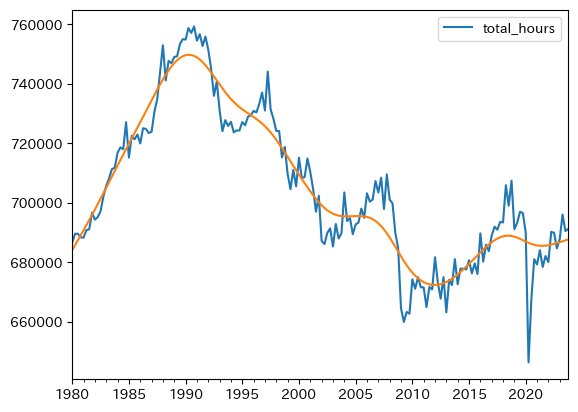

In [7]:
ax_ = df.plot(y='total_hours')
np.exp( df['total_hours_log_trend'] ).plot(ax=ax_)
pass

バブル崩壊後は減少傾向にあるが，過去１０年間に持ち直して来ている。これは雇用の拡大の要因が大きい。

雇用と労働時間の変動（トレンドからの乖離率）を比べてみよう。

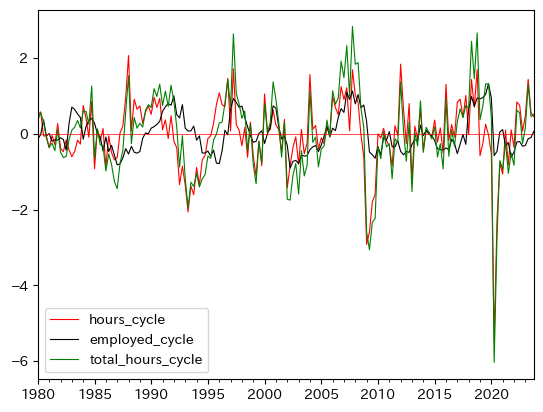

In [8]:
ax_ = df.plot(y=['hours_cycle', 'employed_cycle', 'total_hours_cycle'], lw=0.8, color=['red','k','green'])
ax_.axhline(0, c='red', lw=0.5)
pass

次の２つの点を指摘できる。
* 労働時間の方が変動が大きい。即ち，総労働時間の調整は就業者数よりも労働時間を通して行われていることが伺える。
* 就業者数の変化は、労働時間の変化を後追いする（労働時間が先に動く）傾向がある。これは就業者の調整費用がより高いためであろう。

自己相関係数を計算してみる。

In [9]:
# CELL PROVIDED
cycle_list = ['hours_cycle', 'employed_cycle', 'total_hours_cycle']
var_list = ['平均労働時間','就業者数','総労働時間']

In [10]:
for c, v in zip(cycle_list,var_list):
    
    ac = df[c].autocorr()
    print(f'{ac:.3f}: {v}')

0.486: 平均労働時間
0.830: 就業者数
0.580: 総労働時間


* 就業者数がより大きな自己相関係数の値となっており，就業者での調整により時間がかかるためである。即ち，今期の就業者数は前期の就業者数に依存するところが大きいという意味である。
* AR(1)としてモデル化して$\rho$を計算することもできる。

GDPの変動と比較してみよう。

In [11]:
df['gdp_cycle'].autocorr()

0.6974503788764269

## 資本ストックの特徴

資本ストック`capital`の特徴を考える。まず変動を計算し，それぞれの変数を図示しよう。

In [12]:
df['capital_log_trend'] = py4macro.trend( np.log(df['capital']) )
df['capital_cycle'] = 100 * ( 
    np.log( df['capital'] ) - df['capital_log_trend'] 
)

変動をプロットしよう。

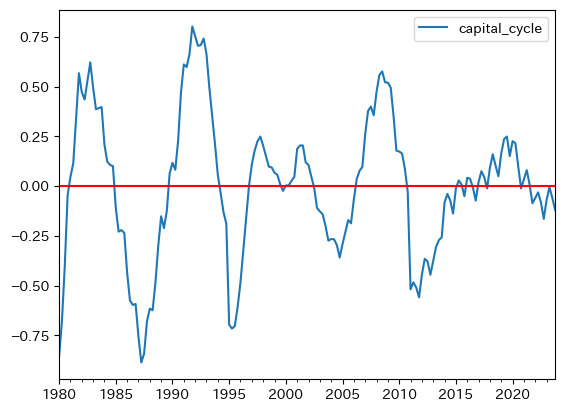

In [13]:
ax = df.plot(y='capital_cycle')
ax.axhline(0, c='red')
pass

非常に持続性が高いことが視覚的に確認できる。

自己相関係数を計算してみる。

In [14]:
df['capital_cycle'].autocorr()

0.9510630841020327

* 持続性が非常に強い　$\Rightarrow$　周期が長い　$\Rightarrow$　短期的な$y_t$の変動への貢献度は低い？（数値で確かめる）
* AR(1)としてモデル化して$\rho$を計算することもできる。

GDPの変動と比較してみよう。

In [15]:
df['gdp_cycle'].autocorr()

0.6974503788764269

## TFPの特徴

TFPについて解くと次式を得る。

$$
A_t=\dfrac{Y_t}{K_t^cH_t^{1-c}}
$$

TFPの水準，トレンド，変動（サイクル）を計算するが，資本の所得分配率`c`を次のように仮定する。

In [16]:
c = 0.36

In [17]:
# 全要素生産性（対数）の計算
df['tfp_log'] = np.log( 
    df['gdp'] / ( df['capital']**c * df['total_hours']**(1-c) ) 
)

# 全要素生産性のトレンド（対数）の計算
df['tfp_log_trend'] = py4macro.trend( df['tfp_log'] )

# 全要素生産性のトレンドからの乖離率の計算
df['tfp_cycle'] = 100 * ( df['tfp_log'] - df['tfp_log_trend'] )

全要素生産性の変動をプロットしよう。

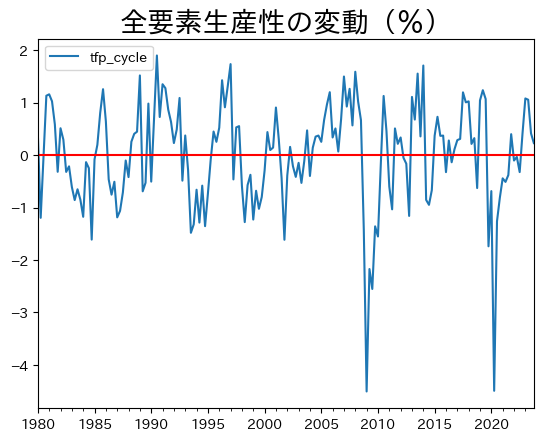

In [19]:
ax = df.plot(y='tfp_cycle')
ax.axhline(0, c='red')
ax.set_title('全要素生産性の変動（％）', size=20)
pass

自己相関係数を計算してみよう。

In [20]:
df['tfp_cycle'].autocorr()

0.5381766486069324

* AR(1)としてモデル化して$\rho$を計算することもできる。

In [21]:
df['gdp_cycle'].autocorr()

0.6974503788764269

## 各要素の寄与度の計算

### 計算準備

In [22]:
# CELL PROVIDED
cols = ['gdp_cycle', 'tfp_cycle', 'capital_cycle', 'total_hours_cycle']

GDPの変動と生産要素の変動の分散と共分散を計算しよう。

In [23]:
vcov = df[cols].cov()
vcov

,gdp_cycle,tfp_cycle,capital_cycle,total_hours_cycle
gdp_cycle,2.200185,1.308605,0.077269,1.349629
tfp_cycle,1.308605,0.958387,0.002884,0.545593
capital_cycle,0.077269,0.002884,0.127081,0.044743
total_hours_cycle,1.349629,0.545593,0.044743,1.231139


### TFP

$$
a_t\text{の寄与度}=\frac{a_t\text{による変動}}{\text{Var}(y_t)}
=\frac{\text{Cov}(a_t,y_t)}{\text{Var}(y_t)}
$$

In [24]:
a_contribution = vcov.iloc[1,0] / vcov.iloc[0,0]
a_contribution

0.5947705683710425

### 資本ストック

$$
k_t\text{の寄与度}=\frac{k_t\text{による変動}}{\text{Var}(y_t)}
=c\frac{\text{Cov}(k_t,y_t)}{\text{Var}(y_t)}
$$

In [25]:
k_contribution = c * vcov.iloc[2,0] / vcov.iloc[0,0]
k_contribution

0.012642949037424614

### 総労働時間

$$
h_t\text{の寄与度}=\frac{h_t\text{による変動}}{\text{Var}(y_t)}
=(1-c)\frac{\text{Cov}(h_t,y_t)}{\text{Var}(y_t)}
$$

In [26]:
h_contribution = (1-c) * vcov.iloc[3,0] / vcov.iloc[0,0]
h_contribution

0.3925864825915978

### 確認

In [27]:
k_contribution + h_contribution + a_contribution

1.0000000000000648

### 結論

In [28]:
# CELL PROVIDED
print(f'TFPの寄与度：{a_contribution:.1%}')

TFPの寄与度：59.5%


In [29]:
# CELL PROVIDED
print(f'資本ストックの寄与度：{k_contribution:.1%}')

資本ストックの寄与度：1.3%


In [30]:
# CELL PROVIDED
print(f'総労働時間の寄与度：{h_contribution:.1%}')

総労働時間の寄与度：39.3%


* 景気循環に対する資本ストックの変動の貢献度は非常に低い。資本ストックは調整に時間がかかり，四半期での産出量の変動には大きく影響を与えない。
* 景気循環に対する総労働時間の変動の寄与度は大きいが，半分を満たない。
* 景気循環の半分以上は全要素生産性によるものである。
    * 「生産性」を表す指標と考えることができるが，もう一つの解釈は「資本ストックと総労働時間以外の全て」となる。では，「その他全て」とは何なのか？それは計算に含まれていない景気循環に影響を及ぼす要因全てである。頻繁に指摘されるのは，資本の稼働率である。建物や機械が設置されていても，景気が悪くなると使われずに生産が減少することになるが，資本ストックには含まれる。また，失業することによる，労働者の技術水準の低下も指摘できる。
    * マクロ経済理論モデルには，景気循環における全要素生産性の役割を強調する実物的景気循環モデル（**R**eal **B**usiness **C**ycles Model; RBCモデル）があり，その拡張版としてDSGEモデル（**D**ynamic **S**tochastic **G**eneral **E**quilibrium Model）がある。